In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


data=pd.read_csv('./heart_cleveland_upload.csv') #importamos datos del archivo csv

data.head(20)


,Edad,Sexo,Tipo_dolor_pecho,Presion_arterial,Colesterol,Azucar_en_sangre,Resul_electrocardiograficos,Frecuencia_cardiaca_max,Angina_inducida,Depresion_del_ST,ST_de_ejercicio,Num_vasos_principales,Estado_corazon,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Text(0.5, 1.0, 'Depresion_del_ST')

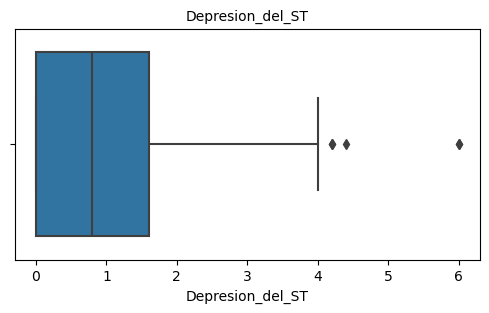

In [4]:
#identificamos los valores faltamtes o atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Depresion_del_ST'])
plt.title('Depresion_del_ST', fontsize=10)

In [5]:
#Contamos los valores mayores a 5 
print("Cantidad de registros de Depresion_del_ST mayores a 5 es =", (data['Depresion_del_ST'] > 5).sum())

Cantidad de registros de Depresion_del_ST mayores a 5 es = 2


In [7]:
#Cambiamos los valores mayores a 5 por la media

media = data['Depresion_del_ST'].mean()
data.loc[data['Depresion_del_ST'] > 5, 'Depresion_del_ST'] = media

print("Cantidad de registros de Depresion_del_ST mayores a 5 es =", (data['Depresion_del_ST'] > 5).sum())

Cantidad de registros de Depresion_del_ST mayores a 5 es = 0


Text(0.5, 1.0, 'Depresion_del_ST')

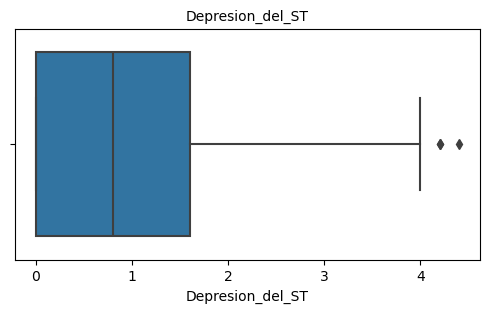

In [8]:
#comprobamos valores atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Depresion_del_ST'])
plt.title('Depresion_del_ST', fontsize=10)

In [3]:
n_minimo=85
n_maximo=185
total_atipico=((data['Frecuencia_cardiaca_max']<n_minimo)|(data['Frecuencia_cardiaca_max']>n_maximo)).sum()
print("El total de datos atipicos de  {}".format(total_atipico))

El total de datos atipicos de  10


Text(0.5, 1.0, 'Datos atipicos Presion_arterial Frecuencia_cardiaca_max')

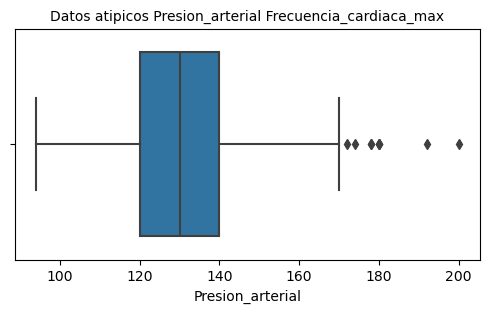

In [28]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Presion_arterial'])
plt.title('Datos atipicos Presion_arterial Frecuencia_cardiaca_max', fontsize=10)

In [13]:
#modificamos valores atipicos por media y redondemos para evitar errores
media = round(data['Presion_arterial'].mean())
data.loc[data['Presion_arterial'] > 185, 'Presion_arterial'] = media
data.loc[data['Presion_arterial'] < 85, 'Presion_arterial'] = media

print("Cantidad de registros de Presion_arterial mayores a 185 es =", (data['Presion_arterial'] > 185).sum())
print("Cantidad de registros de Presion_arterial menores a 85 es =", (data['Presion_arterial'] < 85).sum())

Cantidad de registros de Presion_arterial mayores a 185 es = 0
Cantidad de registros de Presion_arterial menores a 85 es = 0


Text(0.5, 1.0, 'Datos atipicos Presion_arterial Frecuencia_cardiaca_max')

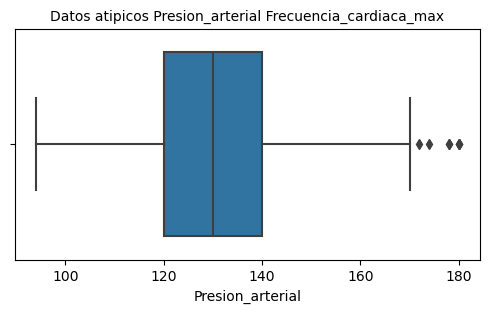

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Presion_arterial'])
plt.title('Datos atipicos Presion_arterial Frecuencia_cardiaca_max', fontsize=10)

In [30]:
data['condicion'].value_counts()

condicion
0    160
1    137
Name: count, dtype: int64

In [8]:
data[['condicion']].head(30)

,condicion
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [19]:
#punto 4

X=data.drop('condicion',axis=1)
Y=data['condicion']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)


In [20]:
print(X_train)

     Edad  Sexo  Tipo_dolor_pecho  Presion_arterial  Colesterol  \
234    56     0                 3        131.693603         288   
82     66     0                 2        146.000000         278   
36     56     1                 1        120.000000         240   
237    56     1                 3        132.000000         184   
133    47     1                 2        108.000000         243   
..    ...   ...               ...               ...         ...   
291    40     1                 3        110.000000         167   
195    61     0                 3        130.000000         330   
170    65     0                 3        150.000000         225   
135    46     0                 2        142.000000         177   
293    39     1                 3        118.000000         219   

     Azucar_en_sangre  Resul_electrocardiograficos  Frecuencia_cardiaca_max  \
234                 1                            2                      133   
82                  0                

In [21]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condicion, Length: 222, dtype: int64


In [25]:
#paso 5 modelo de regrecion logistica 

# modelo_regresion=LinealRegresssion(solver ="liblinear")
#para modelo de regresion lineal
modelo_regresion=LogisticRegression(solver ="liblinear")
modelo_regresion.fit(X_train, Y_train)

prediccion=modelo_regresion.predict(X_test)

In [22]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condicion, Length: 75, dtype: int64


In [26]:
print (prediccion) 

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [28]:
# paso 6 evaluar el desempeño del modelo de regresion 

print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



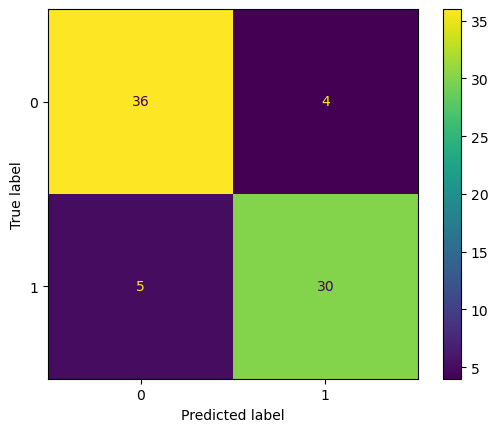

In [29]:
#paso 7 graficar
#matriz de confusion
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


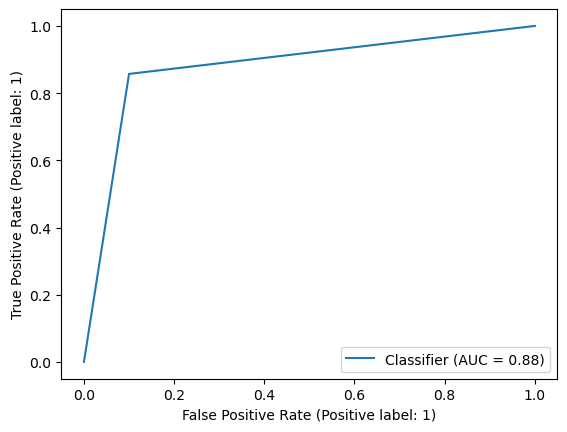

In [30]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,prediccion)